## Performing Data Analysis for Metrological Data of Northern Europe

In [1]:
## Let's import some libraries to get started!
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

## Optional Plotly Method Imports..
import plotly
import cufflinks as cf
cf.go_offline()

## The Data

In [2]:
##Let's start by reading in the weatherHistory.csv file into a pandas dataframe.

df = pd.read_csv('weatherHistory.csv')

In [3]:
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,1016.51,Partly cloudy throughout the day.


In [4]:
df.shape

(96453, 11)

In [5]:
df.dtypes

Formatted Date               object
Summary                      object
Precip Type                  object
Temperature (C)             float64
Apparent Temperature (C)    float64
Humidity                    float64
Wind Speed (km/h)           float64
Wind Bearing (degrees)        int64
Visibility (km)             float64
Pressure (millibars)        float64
Daily Summary                object
dtype: object

In [6]:
df.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,1046.380000


### Let's change Data type of column df['Formatted Date'] (object) ==> (datetime)

In [7]:
df['Formatted Date'] = pd.to_datetime(df['Formatted Date'], utc = True)

df['Formatted Date'].head(10)

0   2006-03-31 22:00:00+00:00
1   2006-03-31 23:00:00+00:00
2   2006-04-01 00:00:00+00:00
3   2006-04-01 01:00:00+00:00
4   2006-04-01 02:00:00+00:00
5   2006-04-01 03:00:00+00:00
6   2006-04-01 04:00:00+00:00
7   2006-04-01 05:00:00+00:00
8   2006-04-01 06:00:00+00:00
9   2006-04-01 07:00:00+00:00
Name: Formatted Date, dtype: datetime64[ns, UTC]

# Exploratory Data Analysis

Let's begin some exploratory data analysis! We'll start by checking out missing data!

## Missing Data

We can use seaborn to create a simple heatmap to see where we are missing data!

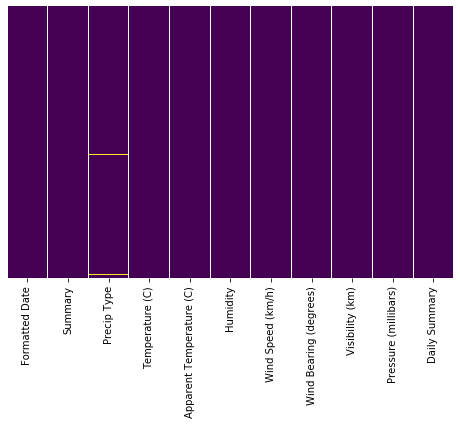

In [8]:
plt.figure(figsize=(8,5))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

### Since we only need 3 columns for our task which is 'Formatted Date', 'Apperent Temperature(c)' & 'Humidity'. Let's find Avg Apparent temperature & Avg humidity of specific month from 2006 - 2016.

In [9]:
## We need every year data of a specific month. Set Formatted Date as our index..
df = df.set_index('Formatted Date')
df.head()

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary
Formatted Date,,,,,,,,,,
2006-03-31 22:00:00+00:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,1015.13,Partly cloudy throughout the day.
2006-03-31 23:00:00+00:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,1015.63,Partly cloudy throughout the day.
2006-04-01 00:00:00+00:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,1015.94,Partly cloudy throughout the day.
2006-04-01 01:00:00+00:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,1016.41,Partly cloudy throughout the day.
2006-04-01 02:00:00+00:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,1016.51,Partly cloudy throughout the day.


In [10]:
# "MS" ==> Month starting 
# Here we displaying the avg apparent temperature (C) and humidity using mean()

cols = df[['Apparent Temperature (C)','Humidity']] 
df_avg = cols.resample('MS').mean()

df_avg.head()

,Apparent Temperature (C),Humidity
Formatted Date,,
2005-12-01 00:00:00+00:00,-4.050000,0.890000
2006-01-01 00:00:00+00:00,-4.173708,0.834610
2006-02-01 00:00:00+00:00,-2.990716,0.843467
2006-03-01 00:00:00+00:00,1.969780,0.778737
2006-04-01 00:00:00+00:00,12.098827,0.728625


## Ploting the Data w.r.t DateTime

In [11]:
# We will plot both value with respect to datetime i.e. index column to check variation in data..

df_avg.iplot(title ='Changes in Apparent Temperature (C) and Humidity w.r.t DateTime',xTitle= 'Formatted Date')

## Conclusion:- 
1. For entire 10 years span, Average Apparent Temperature gradually increase in month of January-July & then decrease in month    of July-December.

2. In every year maximum Apparent temperature noted in July or August month also overall max Apparent Tempearture of 24.52°C      noted in month of July 2012.

3. Sudden fall in temperature has observed in February 2012 i.e -8.81°C.

4. No any drastic changes has observed in Average humidity, i.e.almost straight line parallel to X-axis. Humidity is almost        constant throught the decade.


In [12]:
# Now we will find particular month == 'April' as per question. 
# we will extract only April month data using index.month == 4. 

data = df_avg[df_avg.index.month==4]
data

,Apparent Temperature (C),Humidity
Formatted Date,,
2006-04-01 00:00:00+00:00,12.098827,0.728625
2007-04-01 00:00:00+00:00,11.894421,0.536361
2008-04-01 00:00:00+00:00,11.183688,0.693194
2009-04-01 00:00:00+00:00,14.267076,0.567847
2010-04-01 00:00:00+00:00,11.639406,0.706875
2011-04-01 00:00:00+00:00,12.978997,0.591625
2012-04-01 00:00:00+00:00,11.782770,0.650222
2013-04-01 00:00:00+00:00,12.045563,0.677667
2014-04-01 00:00:00+00:00,12.486181,0.691403


In [13]:
data.iplot(xTitle = 'Month of April',
           title  ='Yearwise Variation in Apparent Temperature (C) and Humidity for the Month of April')

## Final Conclusion : - 
1. Average Apparent Temperature increase for year 2008-09 and then again decrease from 2009-10 to its average level. Then slighlty increase for period 2010-11 and then drop again for year 2011-12. For year 2014-15 it decrease drastically and then come to average level for year 2015-16. 
2. It observed, for year 2009 the Apprent Temperature is at Highest 14.26°C and for year 2015 the Apprent Temperature is at lowest 10.63°C. 
3. There is no any change in average Humidity for given year 2006-2016. The humidity graph line is approximately parallel to the X-axis.  